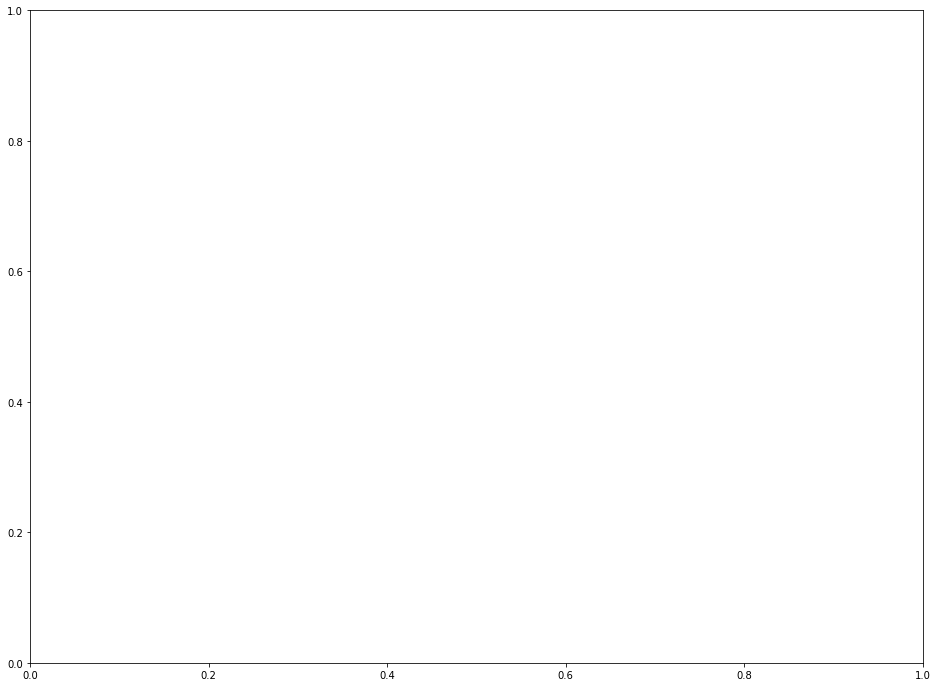

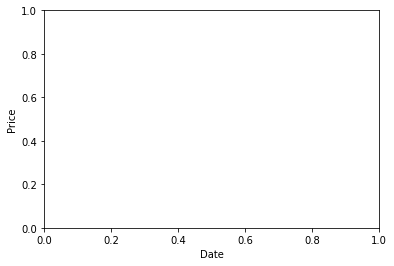

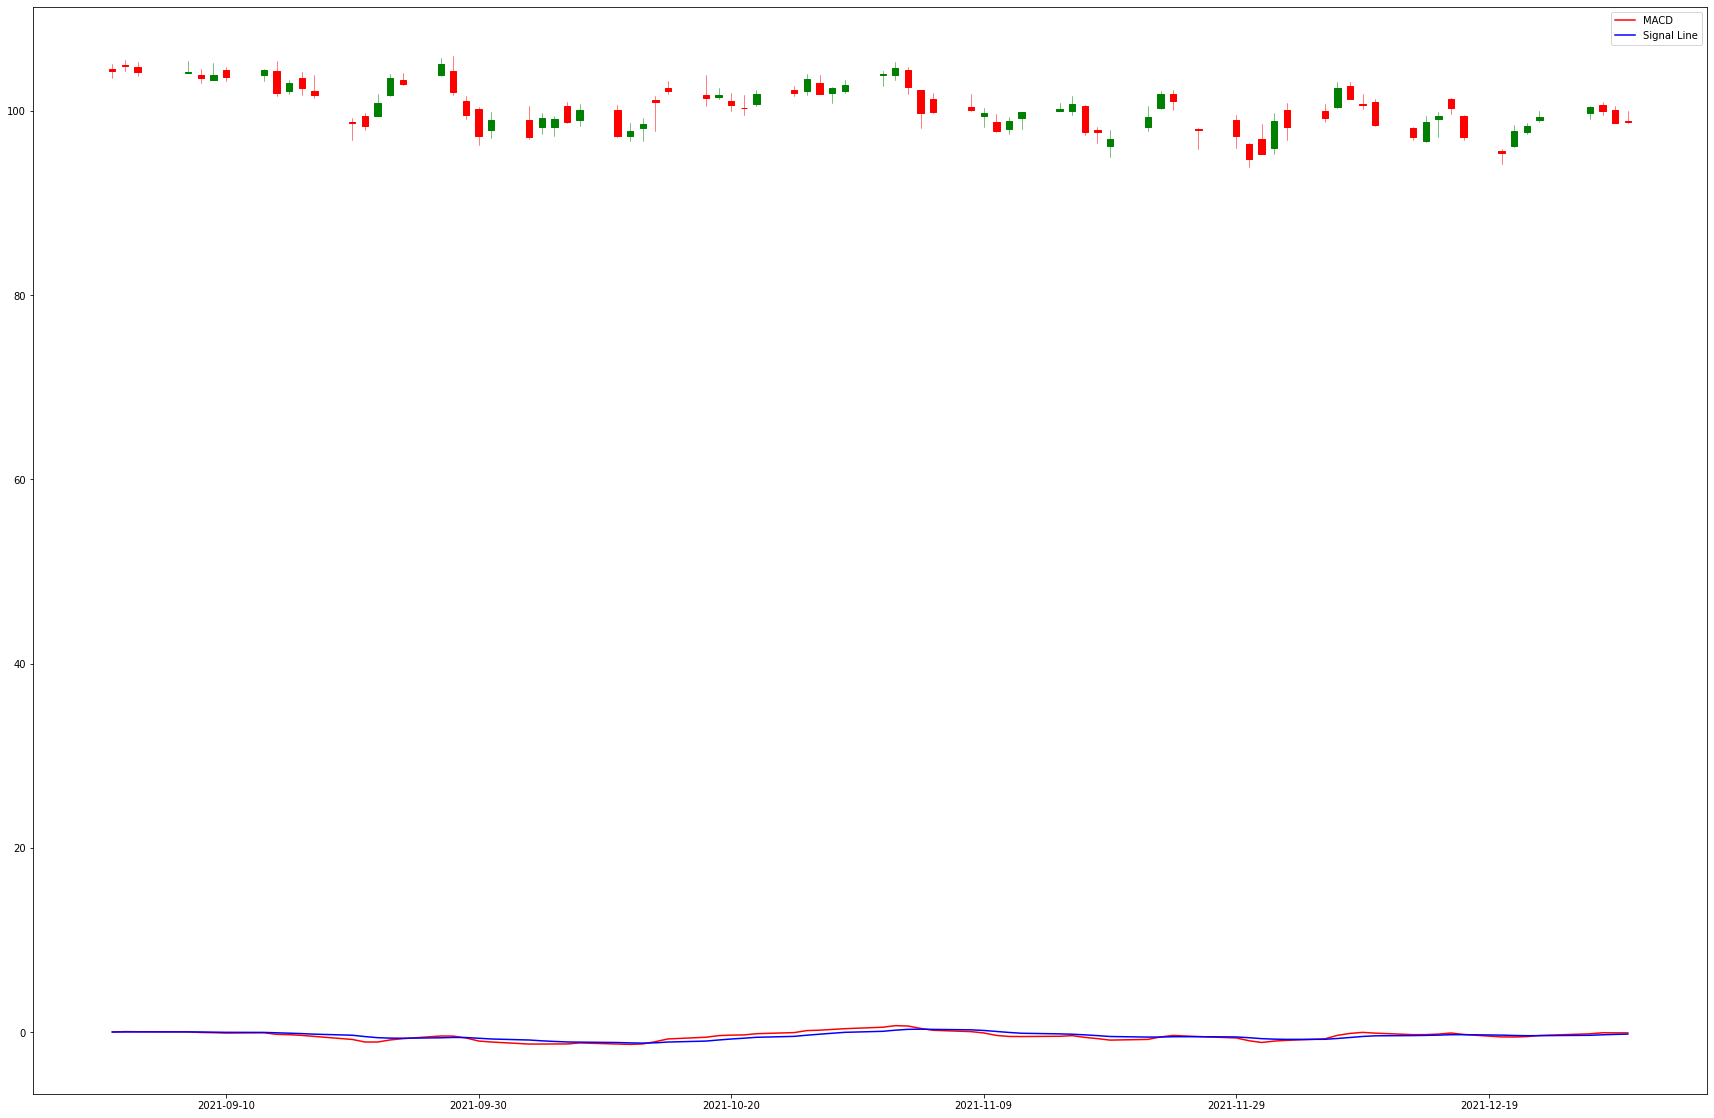

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, date2num
from mplfinance.original_flavor import candlestick_ohlc

# Load data
df = pd.read_csv('/Users/korigray/Documents/GitHub/Final class project/Final-Project/Week 2/MS.csv')

# Set date range
start_date = pd.to_datetime('2021-09-01')
end_date = pd.to_datetime('2021-12-31')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Calculate MACD and signal
ema12 = df['Close'].ewm(span=12, adjust=False).mean()
ema26 = df['Close'].ewm(span=26, adjust=False).mean()
macd = ema12 - ema26
signal = macd.ewm(span=9, adjust=False).mean()

# Convert date to the required format for the candlestick chart
df.loc[:, 'Date'] = df['Date'].apply(date2num)
ohlc = df[['Date', 'Open', 'High', 'Low', 'Close']].values

# Create subplots
fig, ax = plt.subplots(figsize=(16, 12))
fig, ax = plt.subplots()
ax.set_xlabel('Date')
ax.set_ylabel('Price')

# Plot candlestick chart
fig, ax = plt.subplots(figsize=(30, 20))
candlestick_ohlc(ax, ohlc, width= .5, colorup='g', colordown='r')
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

# Plot MACD indicator
ax.plot(df['Date'], macd, label='MACD', color='red')
ax.plot(df['Date'], signal, label='Signal Line', color='blue')
ax.legend()




plt.show()
